# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
breast_cancer_df = pd.read_csv('breast-cancer-wisconsin-data.csv');
breast_cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
    

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
breast_cancer_df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [5]:
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [6]:
breast_cancer_df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column
temp = pd.DataFrame(breast_cancer_df['Bare Nuclei'].str.isdigit())
temp[temp['Bare Nuclei'] == False]

,Bare Nuclei
23,False
40,False
139,False
145,False
158,False
164,False
235,False
249,False
275,False
292,False


In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
breast_cancer_df = breast_cancer_df.replace('?', np.nan)
breast_cancer_df[breast_cancer_df.isnull().any(axis=1)]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,NaN,7,3,1,4
40,1096800,6,6,6,9,6,NaN,7,8,1,2
139,1183246,1,1,1,1,1,NaN,2,1,1,2
145,1184840,1,1,3,1,2,NaN,2,1,1,2
158,1193683,1,1,2,1,3,NaN,1,1,1,2
164,1197510,5,1,1,1,2,NaN,3,1,1,2
235,1241232,3,1,4,1,2,NaN,3,1,1,2
249,169356,3,1,1,1,2,NaN,3,1,1,2
275,432809,3,1,3,1,2,NaN,2,1,1,2
292,563649,8,8,8,1,2,NaN,6,10,1,4


In [9]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
        # - WE CAN IMPUTE WITH THE MEDIAN VALUE OF THE COLUMN.
breast_cancer_df = breast_cancer_df.apply(lambda x: x.fillna(x.median()), axis  = 0)
breast_cancer_df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [10]:
# CONVERTING THE OBJECT COLUMN TO FLOAT64 FORMAT
breast_cancer_df['Bare Nuclei'] = breast_cancer_df['Bare Nuclei'].astype('float64')
breast_cancer_df.dtypes

ID                               int64
ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

In [11]:
breast_cancer_df[breast_cancer_df.isnull().any(axis=1)]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class


In [12]:
# ABOVE RESULT SHOWS THAT THERE ARE NO NULL VALUES.

In [13]:
breast_cancer_df = breast_cancer_df.drop_duplicates()

In [14]:
breast_cancer_df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [15]:
# Check for correlation of variable
breast_cancer_df.corr().transpose()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


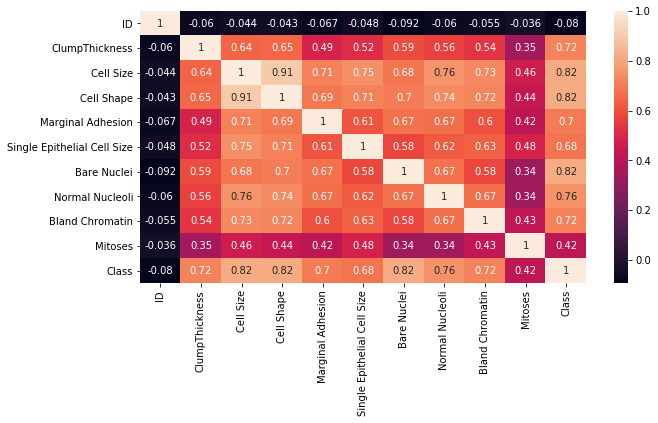

In [16]:
plt.subplots(figsize=(10,5))
sns.heatmap(breast_cancer_df.corr(),annot=True)

In [17]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables
#

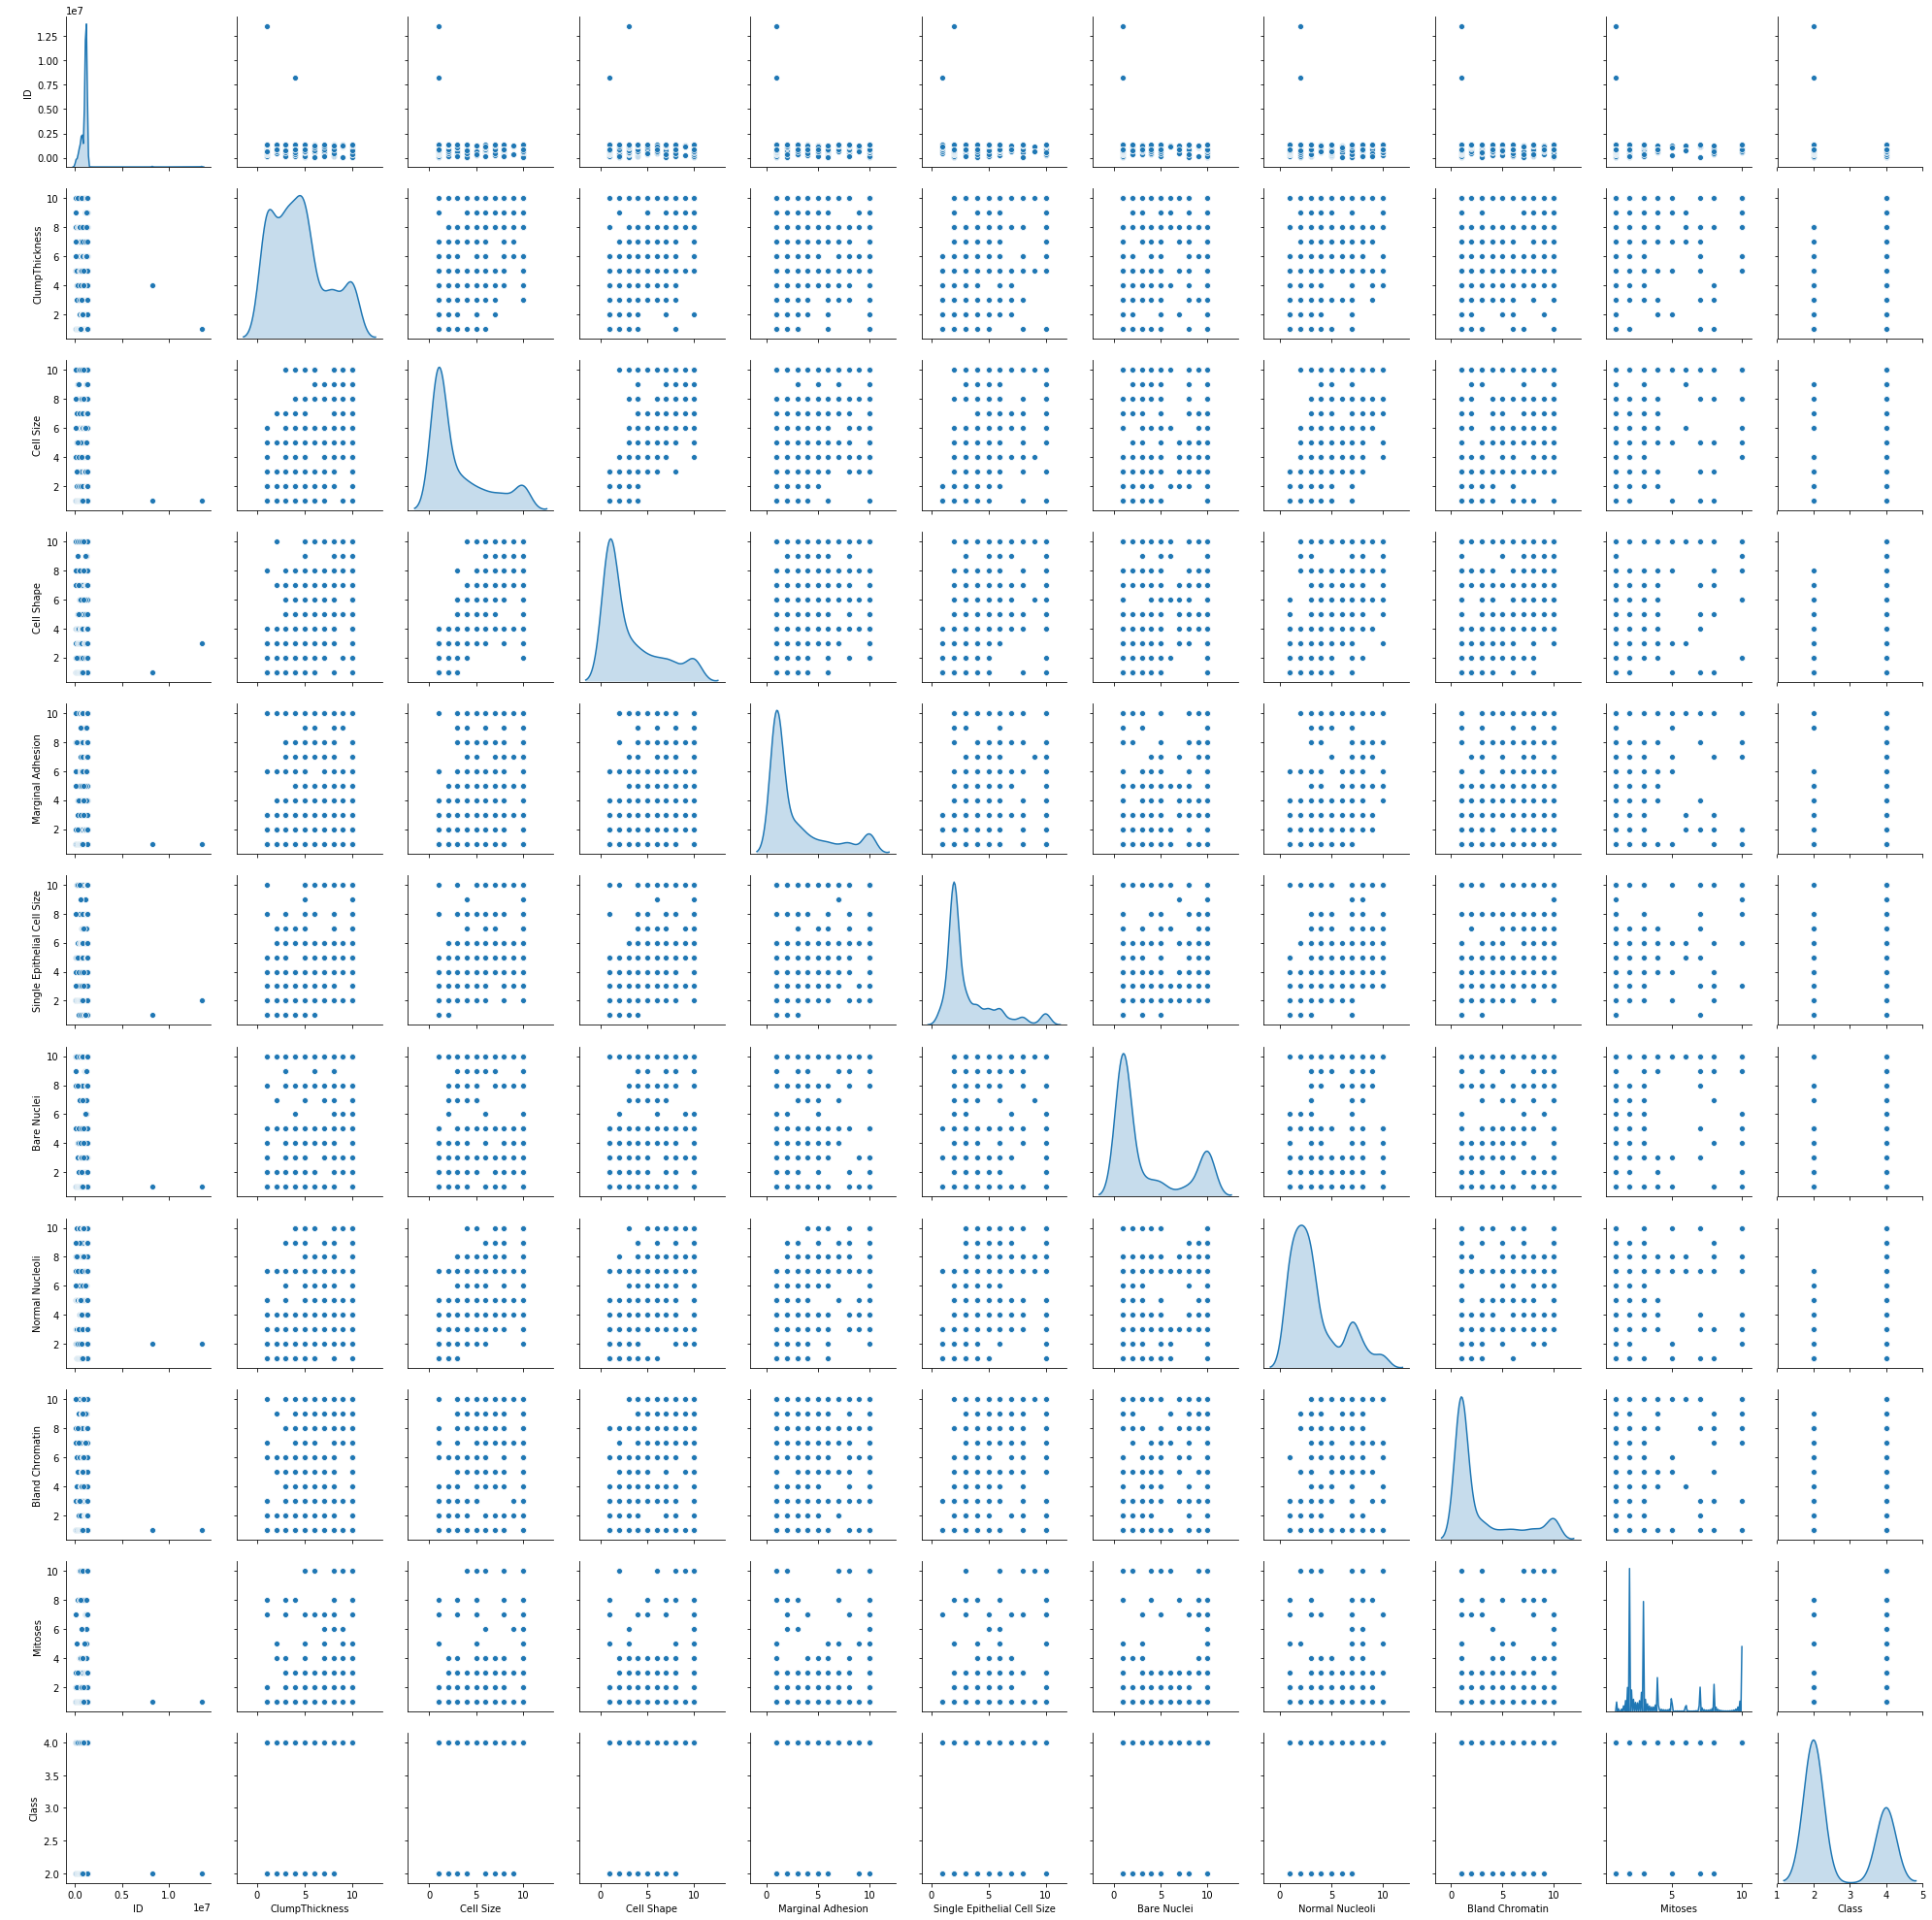

In [18]:
#Let us check for pair plots
sns.pairplot(breast_cancer_df, diag_kind='kde')

In [19]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [20]:
# We could see most of the outliers are now removed.

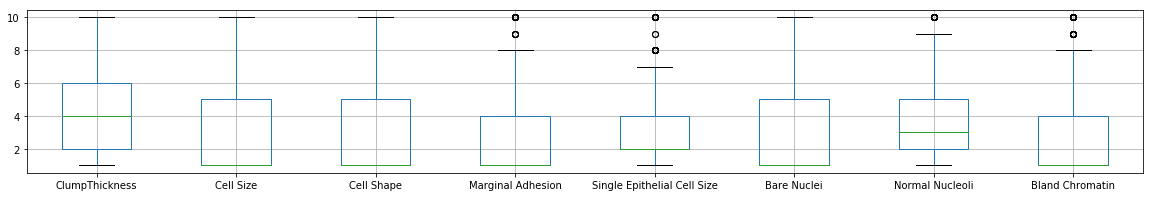

In [21]:
breast_cancer_df.boxplot(figsize=(20,3), column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion'
                                         , 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 
                                          'Bland Chromatin'])

In [22]:
pd.crosstab(breast_cancer_df['ClumpThickness'], breast_cancer_df['Class'])

Class,2,4
ClumpThickness,,
1,139,3
2,46,4
3,94,11
4,68,12
5,84,45
6,16,17
7,1,22
8,4,42
9,0,13


In [23]:
pd.crosstab(breast_cancer_df['Bare Nuclei'], breast_cancer_df['Class'])

Class,2,4
Bare Nuclei,,
1.0,395,17
2.0,21,9
3.0,14,14
4.0,6,13
5.0,10,20
6.0,0,4
7.0,1,7
8.0,2,18
9.0,0,9


In [24]:
pd.crosstab(breast_cancer_df['Normal Nucleoli'], breast_cancer_df['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [25]:

pd.crosstab(breast_cancer_df['Cell Shape'], breast_cancer_df['Class'])

Class,2,4
Cell Shape,,
1,345,2
2,52,7
3,33,23
4,13,31
5,3,30
6,3,27
7,2,28
8,1,27
9,0,7


In [26]:

pd.crosstab(breast_cancer_df['Bland Chromatin'], breast_cancer_df['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [27]:
# OUTLIER TREATMENT
breast_cancer_df['Marginal Adhesion'] = np.where(breast_cancer_df['Marginal Adhesion'] > 8, 8, breast_cancer_df['Marginal Adhesion'])
breast_cancer_df['Single Epithelial Cell Size'] = np.where(breast_cancer_df['Single Epithelial Cell Size'] > 7, 7, breast_cancer_df['Single Epithelial Cell Size'])
breast_cancer_df['Normal Nucleoli'] = np.where(breast_cancer_df['Normal Nucleoli'] > 9, 9, breast_cancer_df['Normal Nucleoli'])
breast_cancer_df['Bland Chromatin'] = np.where(breast_cancer_df['Bland Chromatin'] > 8, 8, breast_cancer_df['Bland Chromatin'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

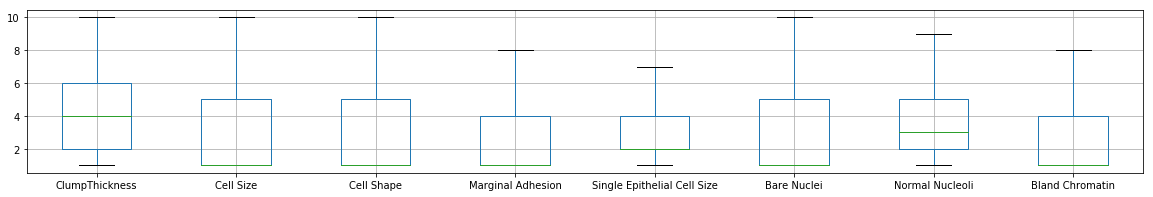

In [28]:
# We could see most of the outliers are now removed.
breast_cancer_df.boxplot(figsize=(20,3), column=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion'
                                         , 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 
                                          'Bland Chromatin'])

# Q6 Create a covariance matrix for identifying Principal components

In [29]:
# PCA
# Step 1 - Create covariance matrix


In [30]:
breast_cancer_df_drp = breast_cancer_df.drop(['ID', 'Class'], axis = 1)

In [31]:
cov_matrix = np.cov(breast_cancer_df_drp.T)
cov_matrix

array([[ 7.93762016,  5.51311079,  5.45212343,  3.52595444,  2.7211081 ,
         6.01908248,  3.78585642,  4.0697966 ,  1.70118424],
       [ 5.51311079,  9.25650701,  8.15558781,  5.51117562,  4.20261248,
         7.53352685,  5.4782777 ,  5.86202225,  2.41267537],
       [ 5.45212343,  8.15558781,  8.76659936,  5.17825456,  3.93215751,
         7.54129488,  5.18516438,  5.66958415,  2.24850129],
       [ 3.52595444,  5.51117562,  5.17825456,  6.14316905,  2.92480596,
         6.16971036,  4.04251909,  4.13121727,  1.71994699],
       [ 2.7211081 ,  4.20261248,  3.93215751,  2.92480596,  3.1312362 ,
         4.00301003,  2.76714205,  3.21245031,  1.3996971 ],
       [ 6.01908248,  7.53352685,  7.54129488,  6.16971036,  4.00301003,
        13.08315139,  5.83655581,  5.72093772,  2.1380703 ],
       [ 3.78585642,  5.4782777 ,  5.18516438,  4.04251909,  2.76714205,
         5.83655581,  5.62055699,  4.24437223,  1.39771986],
       [ 4.0697966 ,  5.86202225,  5.66958415,  4.13121727,  3

# Q7 Identify eigen values and eigen vector

In [32]:
# Step 2- Get eigen values and eigen vector

In [33]:
eigen_value, eigen_vector = np.linalg.eig(cov_matrix)
print(eigen_value)
print("*"*60)
print("*"*60)
print(eigen_vector)

[44.85378841  4.73391388  4.01202206  0.78689451  1.01892391  1.61320925
  2.06978779  2.43365005  2.33411312]
************************************************************
************************************************************
[[ 0.31465485  0.05489112  0.91432893 -0.00163497 -0.02532972 -0.05054846
   0.23077974  0.07382254 -0.00856889]
 [ 0.41936674  0.31575021 -0.09143542 -0.7155342  -0.12653805 -0.04029267
  -0.18708575 -0.3866443   0.04419782]
 [ 0.40693665  0.24920934 -0.03430599  0.58398918  0.39146219 -0.13839643
  -0.34098266 -0.37603006  0.00360809]
 [ 0.30364501 -0.05758431 -0.30728776  0.03908401  0.11641713 -0.36689227
   0.78026704 -0.07007056  0.21596531]
 [ 0.2154034   0.13100094 -0.09824159  0.36034528 -0.88514975 -0.04281784
  -0.04343247  0.0231075   0.09589687]
 [ 0.46255408 -0.83478036 -0.0492544  -0.06391096 -0.00993279 -0.01145383
  -0.26785002  0.08982203  0.05131648]
 [ 0.29716252  0.02752443 -0.133624    0.08372315  0.02865511  0.80251178
   0.30277357 -

# Q8 Find variance and cumulative variance by each eigen vector

In [34]:
tot = sum(eigen_value)
var_exp = [( i /tot ) * 100 for i in sorted(eigen_value, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 70.24175582  77.65514127  83.9380325   87.74916771  91.40442648
  94.64574754  97.17205923  98.76771051 100.        ]


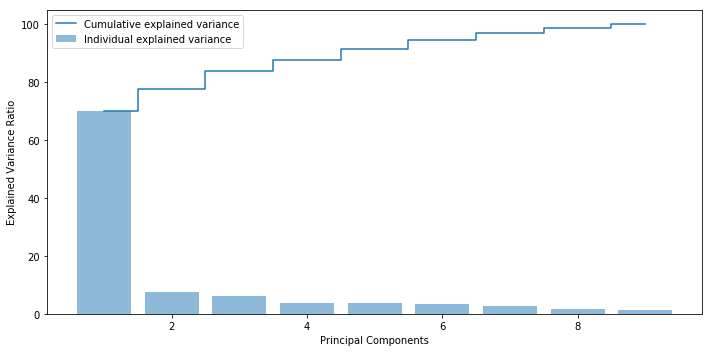

In [35]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigen_value.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigen_value.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [36]:
from sklearn.decomposition import PCA
X=breast_cancer_df_drp
pca=PCA(n_components=6)
X = pca.fit_transform(X)

In [37]:
pca

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

# Q10 Find correlation between components and features

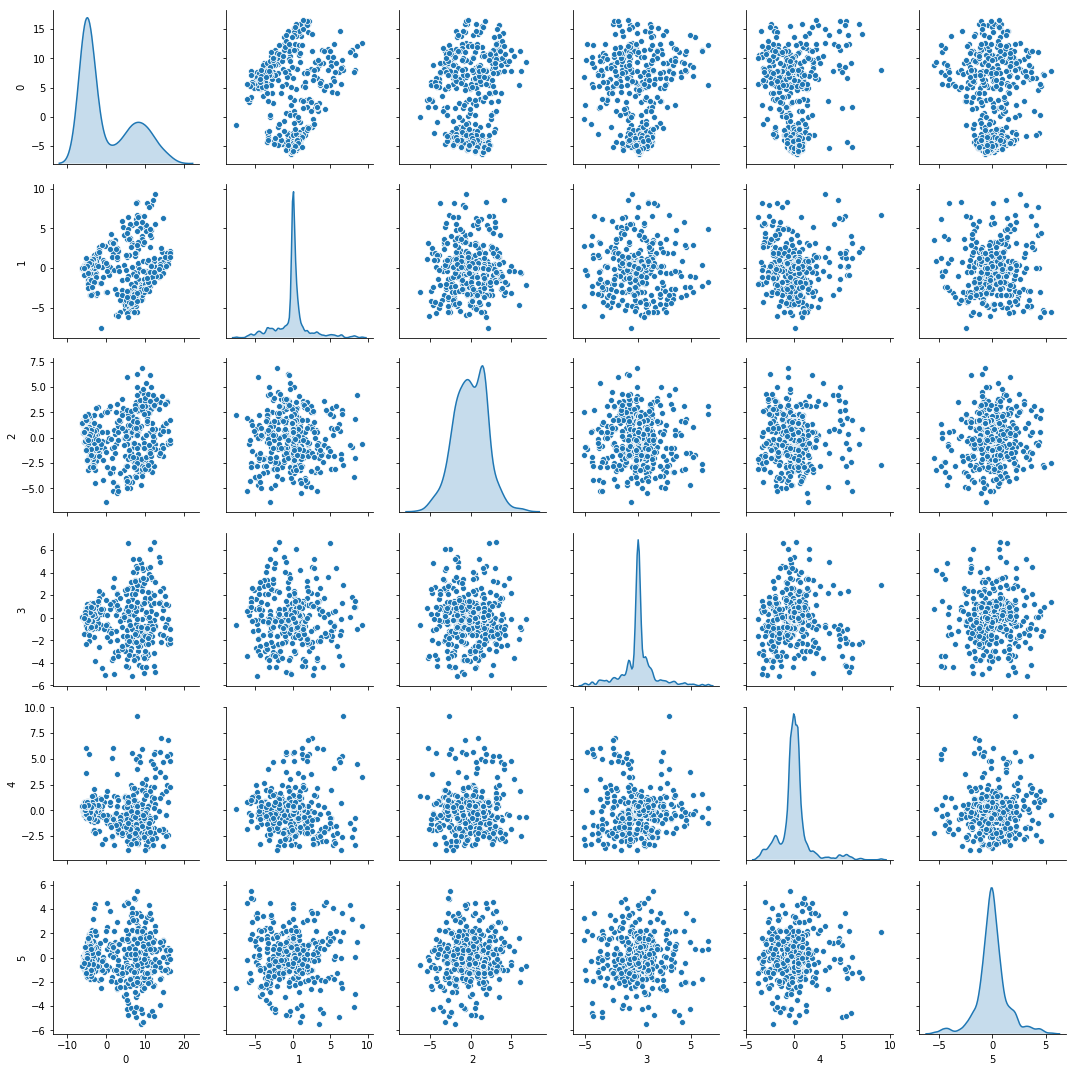

In [38]:
sns.pairplot(pd.DataFrame(X),diag_kind='kde')

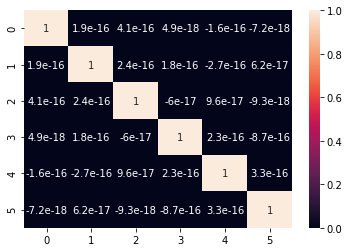

In [39]:
sns.heatmap(pd.DataFrame(X).corr(),annot=True)

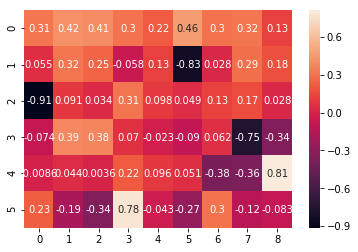

In [40]:
sns.heatmap(pca.components_,annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [41]:
jokes_df = pd.read_csv('jokes.csv')
jokes_df.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [42]:
df_rating_matrix= jokes_df.iloc[0:200,1:]
df_rating_matrix.head(200)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [43]:
df_rating_matrix.replace(to_replace=99,value=0,inplace=True)

### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [44]:
df_rating_matrix.mean().sort_values(ascending=False).head(10)

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
dtype: float64

In [45]:
df_rating_matrix

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
